In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!apt-get install openjdk-8-jdk-headless -qq 

In [ ]:
!sudo add-apt-repository ppa:webupd8team/java
!sudo apt-get update
!sudo apt-get install oracle-java8-installer

 The Oracle JDK License has changed for releases starting April 16, 2019.

The new Oracle Technology Network License Agreement for Oracle Java SE is substantially different from prior Oracle JDK licenses. The new license permits certain uses, such as personal use and development use, at no cost -- but other uses authorized under prior Oracle JDK licenses may no longer be available. Please review the terms carefully before downloading and using this product. An FAQ is available here: https://www.oracle.com/technetwork/java/javase/overview/oracle-jdk-faqs.html

Oracle Java downloads now require logging in to an Oracle account to download Java updates, like the latest Oracle Java 8u211 / Java SE 8u212. Because of this I cannot update the PPA with the latest Java (and the old links were broken by Oracle).

For this reason, THIS PPA IS DISCONTINUED.

UPDATE:

For Oracle Java 17, see a different PPA -> https://www.linuxuprising.com/2021/09/how-to-install-oracle-java-17-lts-on.html

Old descr

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder \
      .master("local") \
      .appName("MyFirst ML Project") \
      .config("spark.executor.memory", "12gb") \
      .getOrCreate()
    
sc = spark.sparkContext

In [ ]:
sc

<SparkContext master=local appName=MyFirst ML Project>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WSN-DS.csv to WSN-DS (2).csv


In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sbn
import matplotlib.pyplot as plt
import tensorflow.keras

In [ ]:
data = pd.read_csv("WSN-DS.csv")

In [ ]:
dataset=data

In [ ]:
dataset

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374656,201096,1003,0,201051,6.98337,0,5,1,0,0,1,7,96,0,67,170.14779,3,0.15974,Normal
374657,201097,1003,0,201037,29.32867,0,5,1,0,0,1,31,39,0,24,82.21043,2,0.06877,Normal
374658,201098,1003,0,201095,18.51963,0,5,1,0,0,1,17,55,0,31,139.26438,1,0.09437,Normal
374659,201099,1003,0,201051,8.55001,0,5,1,0,0,1,3,96,0,65,158.27492,3,0.16047,Normal


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [ ]:
dataset.describe()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
count,3.746610e+05,374661.000000,374661.000000,3.746610e+05,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000
mean,2.749693e+05,1064.748712,0.115766,2.749804e+05,22.599380,0.267698,6.940562,0.779905,0.737493,0.288984,0.747452,9.687104,44.857925,73.890045,4.569448,22.562735,2.497957,0.305661
std,3.898986e+05,899.646164,0.319945,3.899112e+05,21.955794,2.061148,7.044319,0.414311,4.691498,2.754746,0.434475,14.681901,42.574464,230.246335,19.679155,50.261604,2.407337,0.669462
min,1.010000e+05,50.000000,0.000000,1.010000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070930e+05,353.000000,0.000000,1.070960e+05,4.735440,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.056150
50%,1.160710e+05,803.000000,0.000000,1.160720e+05,18.372610,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,0.000000,0.000000,2.000000,0.097970
75%,2.150720e+05,1503.000000,0.000000,2.150730e+05,33.776000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,13.000000,62.000000,0.000000,0.000000,0.000000,4.000000,0.217760
max,3.402096e+06,3600.000000,1.000000,3.402100e+06,214.274620,97.000000,117.000000,1.000000,124.000000,99.000000,1.000000,99.000000,241.000000,1496.000000,241.000000,201.934940,15.000000,45.093940


In [ ]:
dataset.value_counts("Attack type")

Attack type
Normal       340066
Grayhole      14596
Blackhole     10049
TDMA           6638
Flooding       3312
dtype: int64

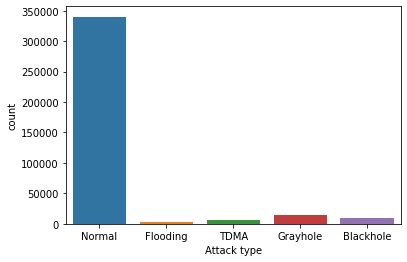

In [ ]:
sbn.countplot(x="Attack type", data = dataset)

In [ ]:
X = dataset.iloc[:,0:-1].values # bağımsız değişkenler
y = dataset.iloc[:,-1].values # bağımlı değişken

In [ ]:
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [ ]:
dataset_features=pd.DataFrame(X, columns= ['id','Time','Is_CH','Who_CH','Dist_To_CH',
                                           'ADV_S', 'ADV_R','JOIN_S','JOIN_R','SCH_S',
                                           'SCH_R','Rank','DATA_S','DATA_R',
                                           'Data_Sent_To_BS','Dist_CH_To_BS','Send_Code',
                                           'Expaned_Energy'])

dataset_class=pd.DataFrame(y, columns= ['Attack_Type'])

In [ ]:
dataset_class.Attack_Type.value_counts()

3    340066
2     14596
0     10049
4      6638
1      3312
Name: Attack_Type, dtype: int64

In [ ]:
dataset_combined_and_labelized =pd.concat([dataset_features, dataset_class],axis=1)

In [ ]:
dataset= dataset_combined_and_labelized.drop(["id","Time","Who_CH"], axis=1)

In [ ]:
dataset.head(3)

,Is_CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,Dist_CH_To_BS,Send_Code,Expaned_Energy,Attack_Type
0,1.0,0.00000,1.0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,1200.0,48.0,130.08535,0.0,2.46940,3
1,0.0,75.32345,0.0,4.0,1.0,0.0,0.0,1.0,2.0,38.0,0.0,0.0,0.00000,4.0,0.06957,3
2,0.0,46.95453,0.0,4.0,1.0,0.0,0.0,1.0,19.0,41.0,0.0,0.0,0.00000,3.0,0.06898,3


In [ ]:
dataset= spark.createDataFrame(dataset)

In [ ]:
dataset.printSchema()

root
 |-- Is_CH: double (nullable = true)
 |-- Dist_To_CH: double (nullable = true)
 |-- ADV_S: double (nullable = true)
 |-- ADV_R: double (nullable = true)
 |-- JOIN_S: double (nullable = true)
 |-- JOIN_R: double (nullable = true)
 |-- SCH_S: double (nullable = true)
 |-- SCH_R: double (nullable = true)
 |-- Rank: double (nullable = true)
 |-- DATA_S: double (nullable = true)
 |-- DATA_R: double (nullable = true)
 |-- Data_Sent_To_BS: double (nullable = true)
 |-- Dist_CH_To_BS: double (nullable = true)
 |-- Send_Code: double (nullable = true)
 |-- Expaned_Energy: double (nullable = true)
 |-- Attack_Type: long (nullable = true)



In [ ]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['Is_CH',
                                       'Dist_To_CH',
                                       'ADV_S',
                                       'ADV_R',
                                       'JOIN_S',
                                       'JOIN_R',
                                       'SCH_S',
                                       'SCH_R',
                                       'Rank',
                                       'DATA_S',
                                       'DATA_R',
                                       'Data_Sent_To_BS',
                                       'Dist_CH_To_BS',
                                       'Send_Code',
                                       'Expaned_Energy'],
                           outputCol='vectorized_features')

vectorized_data = assembler.transform(dataset)

In [ ]:
from pyspark.ml.feature import Normalizer
normalized_dataset=Normalizer().setP(1).setInputCol("vectorized_features")\
                               .setOutputCol("normalized_features")
normalized_data=normalized_dataset.transform(vectorized_data)

In [ ]:
dataset_son=normalized_data.select('normalized_features', 'Attack_Type')

In [ ]:
dataset_son

DataFrame[normalized_features: vector, Attack_Type: bigint]

In [ ]:
train_data,test_data = dataset_son.randomSplit([0.7,0.3], seed=0)

In [ ]:
#**********************RANDOM FOREST ALGORİTMASI*******************

from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol='Attack_Type', 
                            featuresCol='normalized_features', maxDepth=5)
model = rf.fit(train_data)
predictions = model.transform(test_data)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(
    labelCol="Attack_Type",predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy = %g" % (accuracy))

evaluator = MulticlassClassificationEvaluator(
    labelCol="Attack_Type", predictionCol="prediction", metricName="f1")
F1_Score = evaluator.evaluate(predictions)
print("F1 Score = %g" % (F1_Score))

evaluator = MulticlassClassificationEvaluator(
    labelCol="Attack_Type", predictionCol="prediction", metricName="weightedPrecision")
Precision = evaluator.evaluate(predictions)
print("Precision = %g" % (Precision))

evaluator = MulticlassClassificationEvaluator(
    labelCol="Attack_Type", predictionCol="prediction", metricName="weightedRecall")
Recall = evaluator.evaluate(predictions)
print("Recall = %g" % (Recall))

Accuracy = 0.98133
F1 Score = 0.980531
Precision = 0.980749
Recall = 0.98133


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = predictions.select("Attack_Type")
y_true = y_true.toPandas()

y_pred = predictions.select("prediction")
y_pred = y_pred.toPandas()

target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.95      0.90      0.92      3036
     Class 1       0.92      0.69      0.79      1040
     Class 2       0.88      0.82      0.85      4380
     Class 3       0.99      1.00      0.99    102438
     Class 4       0.97      0.75      0.85      1961

    accuracy                           0.98    112855
   macro avg       0.94      0.83      0.88    112855
weighted avg       0.98      0.98      0.98    112855



In [ ]:
print(confusion_matrix(y_true, y_pred))

[[  2718      0    309      0      9]
 [     1    713     60    248     18]
 [   132      0   3577    665      6]
 [     1     59     95 102268     15]
 [     7      0      2    480   1472]]


In [ ]:
#**********************DECISION TREE ALGORİTMASI*******************

from pyspark.ml.classification import DecisionTreeClassifier

dtr = DecisionTreeClassifier(labelCol='Attack_Type',
                             featuresCol="normalized_features", maxDepth=5)
model2 = dtr.fit(train_data)
predictions2 = model2.transform(test_data)

In [ ]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="Attack_Type", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions2)
print("Accuracy = %g" % (accuracy))
evaluator = MulticlassClassificationEvaluator(
    labelCol="Attack_Type", predictionCol="prediction", metricName="f1")
F1_Score = evaluator.evaluate(predictions2)
print("F1 Score = %g" % (F1_Score))
evaluator = MulticlassClassificationEvaluator(
    labelCol="Attack_Type", predictionCol="prediction", metricName="weightedPrecision")
Precision = evaluator.evaluate(predictions2)
print("Precision = %g" % (Precision))
evaluator = MulticlassClassificationEvaluator(
    labelCol="Attack_Type", predictionCol="prediction", metricName="weightedRecall")
Recall = evaluator.evaluate(predictions2)
print("Recall = %g" % (Recall))

Accuracy = 0.981374
F1 Score = 0.980736
Precision = 0.980772
Recall = 0.981374


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = predictions2.select("Attack_Type")
y_true = y_true.toPandas()

y_pred = predictions2.select("prediction")
y_pred = y_pred.toPandas()

target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.97      0.86      0.91      3036
     Class 1       0.92      0.67      0.78      1040
     Class 2       0.86      0.81      0.83      4380
     Class 3       0.99      1.00      0.99    102438
     Class 4       0.93      0.86      0.89      1961

    accuracy                           0.98    112855
   macro avg       0.93      0.84      0.88    112855
weighted avg       0.98      0.98      0.98    112855



In [ ]:
print(confusion_matrix(y_true, y_pred))

[[  2609      2    418      0      7]
 [     0    700     77    226     37]
 [    74      0   3545    754      7]
 [     2     59     79 102216     82]
 [     7      2      2    267   1683]]


In [ ]:
#**********************NAIVE BAYES ALGORİTMASI*******************

from pyspark.ml.classification import NaiveBayes

nb = NaiveBayes(labelCol='Attack_Type', featuresCol="normalized_features",
                smoothing=1.0, modelType="gaussian")
model3 = nb.fit(train_data)
predictions3 = model3.transform(test_data)

In [ ]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="Attack_Type", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions3)
print("Accuracy = %g" % (accuracy))

evaluator = MulticlassClassificationEvaluator(
    labelCol="Attack_Type", predictionCol="prediction", metricName="f1")
F1_Score = evaluator.evaluate(predictions3)
print("F1 Score = %g" % (F1_Score))

evaluator = MulticlassClassificationEvaluator(
    labelCol="Attack_Type", predictionCol="prediction", metricName="weightedPrecision")
Precision = evaluator.evaluate(predictions3)
print("Precision = %g" % (Precision))

evaluator = MulticlassClassificationEvaluator(
    labelCol="Attack_Type", predictionCol="prediction", metricName="weightedRecall")
Recall = evaluator.evaluate(predictions3)
print("Recall = %g" % (Recall))

Accuracy = 0.951043
F1 Score = 0.956169
Precision = 0.967465
Recall = 0.951043


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = predictions3.select("Attack_Type")
y_true = y_true.toPandas()

y_pred = predictions3.select("prediction")
y_pred = y_pred.toPandas()

target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.63      1.00      0.77      3036
     Class 1       0.29      0.89      0.43      1040
     Class 2       0.67      0.52      0.58      4380
     Class 3       1.00      0.97      0.98    102438
     Class 4       0.89      0.80      0.84      1961

    accuracy                           0.95    112855
   macro avg       0.69      0.84      0.72    112855
weighted avg       0.97      0.95      0.96    112855



In [ ]:
print(confusion_matrix(y_true, y_pred))

[[ 3032     0     0     0     4]
 [    6   925   105     0     4]
 [ 1749   346  2278     0     7]
 [    2  1683  1039 99532   182]
 [    6   265     0   127  1563]]


In [ ]:
#********************** LOGISTIC RESGRESSION ALGORİTMASI*******************
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(labelCol='Attack_Type', featuresCol="normalized_features")
model4 = lr.fit(train_data)
predictions4 = model4.transform(test_data)

In [ ]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="Attack_Type", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions4)
print("Accuracy = %g" % (accuracy))

evaluator = MulticlassClassificationEvaluator(
    labelCol="Attack_Type", predictionCol="prediction", metricName="f1")
F1_Score = evaluator.evaluate(predictions4)
print("F1 Score = %g" % (F1_Score))

evaluator = MulticlassClassificationEvaluator(
    labelCol="Attack_Type", predictionCol="prediction", metricName="weightedPrecision")
Precision = evaluator.evaluate(predictions4)
print("Precision = %g" % (Precision))

evaluator = MulticlassClassificationEvaluator(
    labelCol="Attack_Type", predictionCol="prediction", metricName="weightedRecall")
Recall = evaluator.evaluate(predictions4)
print("Recall = %g" % (Recall))

Accuracy = 0.967179
F1 Score = 0.963803
Precision = 0.968957
Recall = 0.967179


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true = predictions4.select("Attack_Type")
y_true = y_true.toPandas()

y_pred = predictions4.select("prediction")
y_pred = y_pred.toPandas()

target_names = ["Class {}".format(i) for i in range(5)]
print(classification_report(y_true, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.63      1.00      0.77      3036
     Class 1       0.91      0.75      0.82      1040
     Class 2       0.81      0.38      0.52      4380
     Class 3       0.99      1.00      0.99    102438
     Class 4       0.97      0.89      0.93      1961

    accuracy                           0.97    112855
   macro avg       0.86      0.80      0.81    112855
weighted avg       0.97      0.97      0.96    112855



In [ ]:
print(confusion_matrix(y_true, y_pred))

[[  3027      1      7      1      0]
 [     0    776      0    264      0]
 [  1746      0   1668    966      0]
 [     6     77    366 101933     56]
 [     7      0      8    199   1747]]
